In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# analysis the text within file
from textblob import TextBlob

In [2]:
data = pd.read_csv('complaints[1].csv', encoding='ISO-8859-1')
data.head(10)

,Row,Document Number,Receive Date,Form Status,Form Status Date,Complainant Connection,Facility Type,Well Name,Well Number,API State Code,...,Issue Description,Issue Resolution,Issue Resolved Date,Letter Sent,NOAV,NOAV Number,Form 19,Form 19 Number,Form 27,Form 27 Number
0,1,200449466,03/02/2021,ON HOLD,03/02/2021,Nearby resident,LOCATION,,,05,...,"Location: Ivey Pad\nIssue: On February 13, 202...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,200449464,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,Excessive noise coming from the Mae J site (46...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,200449463,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,Location: MAE J\nIssue: The noise started arou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,200449463,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,It smells like rubbing alcohol or acetone. It ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,200449462,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,Location: The fracking site is near our house....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,200449462,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,\nAlso our air filter in our room shows poor a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,200449461,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,Location: Mae J 8-8HZ 05-123-50509 Mae J 8-1HZ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,200449460,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,Location: Ivey Wells site south of 470 and nor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,200449459,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,Location: Well Knight Pad\nIssue: 3-5 extremel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,200449458,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,Location: North of Weld CR 10 between Weld CR ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['Row', 'Document Number', 'Receive Date', 'Form Status',
       'Form Status Date', 'Complainant Connection', 'Facility Type',
       'Well Name', 'Well Number', 'API State Code', 'API County Code',
       'API Sequence Number', 'Facility Name', 'Facility ID', 'County Name',
       'Qtr Qtr', 'Section', 'Township', 'Range', 'Meridian',
       'Operator Number', 'Operator', 'Initial Contact Date',
       'Method Received', 'Routed Agency', 'Issue Category',
       'Issue Description', 'Issue Resolution', 'Issue Resolved Date',
       'Letter Sent', 'NOAV', 'NOAV Number', 'Form 19', 'Form 19 Number',
       'Form 27', 'Form 27 Number'],
      dtype='object')

In [4]:
TextBlob(data['Issue Description'][1])

TextBlob("Excessive noise coming from the Mae J site (466612), immediately north of the Colliers Hill neighborhood. Noise was (and is) consistently measured at >70dB from the Mae J site as measured from approximately 1000ft directly south in the Colliers Hill residential zone at 9pm on 03/01/2021 (an otherwise calm evening). This excessive noise is consistently heard from operations in recent days. 

For the sake of the good people of the people with homes in the northern Colliers Hill neighborhood, please help.
Thank you for any and all consideration to the request.")

In [5]:
# connotation of the words
polarity = []
# opinions
subjectivity = []
# data.shape  = number of rows in dataset
for i in range(data.shape[0]):
    try:
        text = TextBlob(data['Issue Description'][i])
        # sentiment  = attribute of "text" item --> attribute: list of qualities
        subjectivity.append(text.sentiment.subjectivity)
        polarity.append(text.sentiment.polarity)
    except:
        subjectivity.append(np.nan)
        polarity.append(np.nan)

In [6]:
print(len(subjectivity), len(polarity), data.shape[0])

5422 5422 5422


(array([  29.,   26.,   85.,  378., 1397., 2932.,  421.,  134.,   11.,
           8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

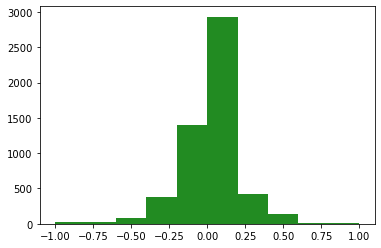

In [7]:
plt.hist(polarity, color="forestgreen")

(array([ 834.,  263.,  577.,  846., 1074.,  940.,  392.,  190.,  122.,
         183.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

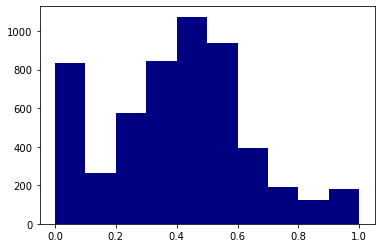

In [8]:
plt.hist(subjectivity, color="navy")

In [9]:
data['subjectivity'] = subjectivity
data['polarity'] = polarity

In [10]:
data.head()

,Row,Document Number,Receive Date,Form Status,Form Status Date,Complainant Connection,Facility Type,Well Name,Well Number,API State Code,...,Issue Resolved Date,Letter Sent,NOAV,NOAV Number,Form 19,Form 19 Number,Form 27,Form 27 Number,subjectivity,polarity
0,1,200449466,03/02/2021,ON HOLD,03/02/2021,Nearby resident,LOCATION,,,05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,-0.233333
1,2,200449464,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.566667,0.077778
2,3,200449463,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
3,4,200449463,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
4,5,200449462,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746667,-0.147000


In [11]:
data.sort_values(by='polarity')[['Operator', 'polarity','subjectivity']]

,Operator,polarity,subjectivity
3259,CRESTONE PEAK RESOURCES OPERATING LLC ...,-1.00,1.0
2462,CRESTONE PEAK RESOURCES OPERATING LLC ...,-1.00,1.0
2420,CRESTONE PEAK RESOURCES OPERATING LLC ...,-1.00,1.0
2391,CRESTONE PEAK RESOURCES OPERATING LLC ...,-1.00,1.0
583,CRESTONE PEAK RESOURCES OPERATING LLC ...,-1.00,1.0
...,...,...,...
1054,ROCKY MOUNTAIN MIDSTREAM LLC ...,0.91,1.0
189,BURLINGTON RESOURCES OIL & GAS LP ...,0.91,1.0
3301,CRESTONE PEAK RESOURCES OPERATING LLC ...,0.91,1.0
1997,CRESTONE PEAK RESOURCES OPERATING LLC ...,1.00,1.0


In [12]:
data.columns

Index(['Row', 'Document Number', 'Receive Date', 'Form Status',
       'Form Status Date', 'Complainant Connection', 'Facility Type',
       'Well Name', 'Well Number', 'API State Code', 'API County Code',
       'API Sequence Number', 'Facility Name', 'Facility ID', 'County Name',
       'Qtr Qtr', 'Section', 'Township', 'Range', 'Meridian',
       'Operator Number', 'Operator', 'Initial Contact Date',
       'Method Received', 'Routed Agency', 'Issue Category',
       'Issue Description', 'Issue Resolution', 'Issue Resolved Date',
       'Letter Sent', 'NOAV', 'NOAV Number', 'Form 19', 'Form 19 Number',
       'Form 27', 'Form 27 Number', 'subjectivity', 'polarity'],
      dtype='object')

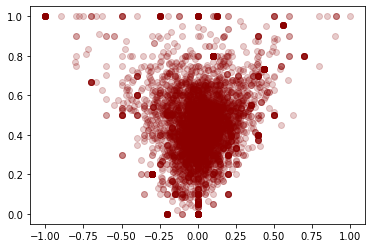

In [13]:
plt.scatter(data.polarity, data.subjectivity, alpha=0.2, color="darkred")
# alpha = darkness of the points

C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


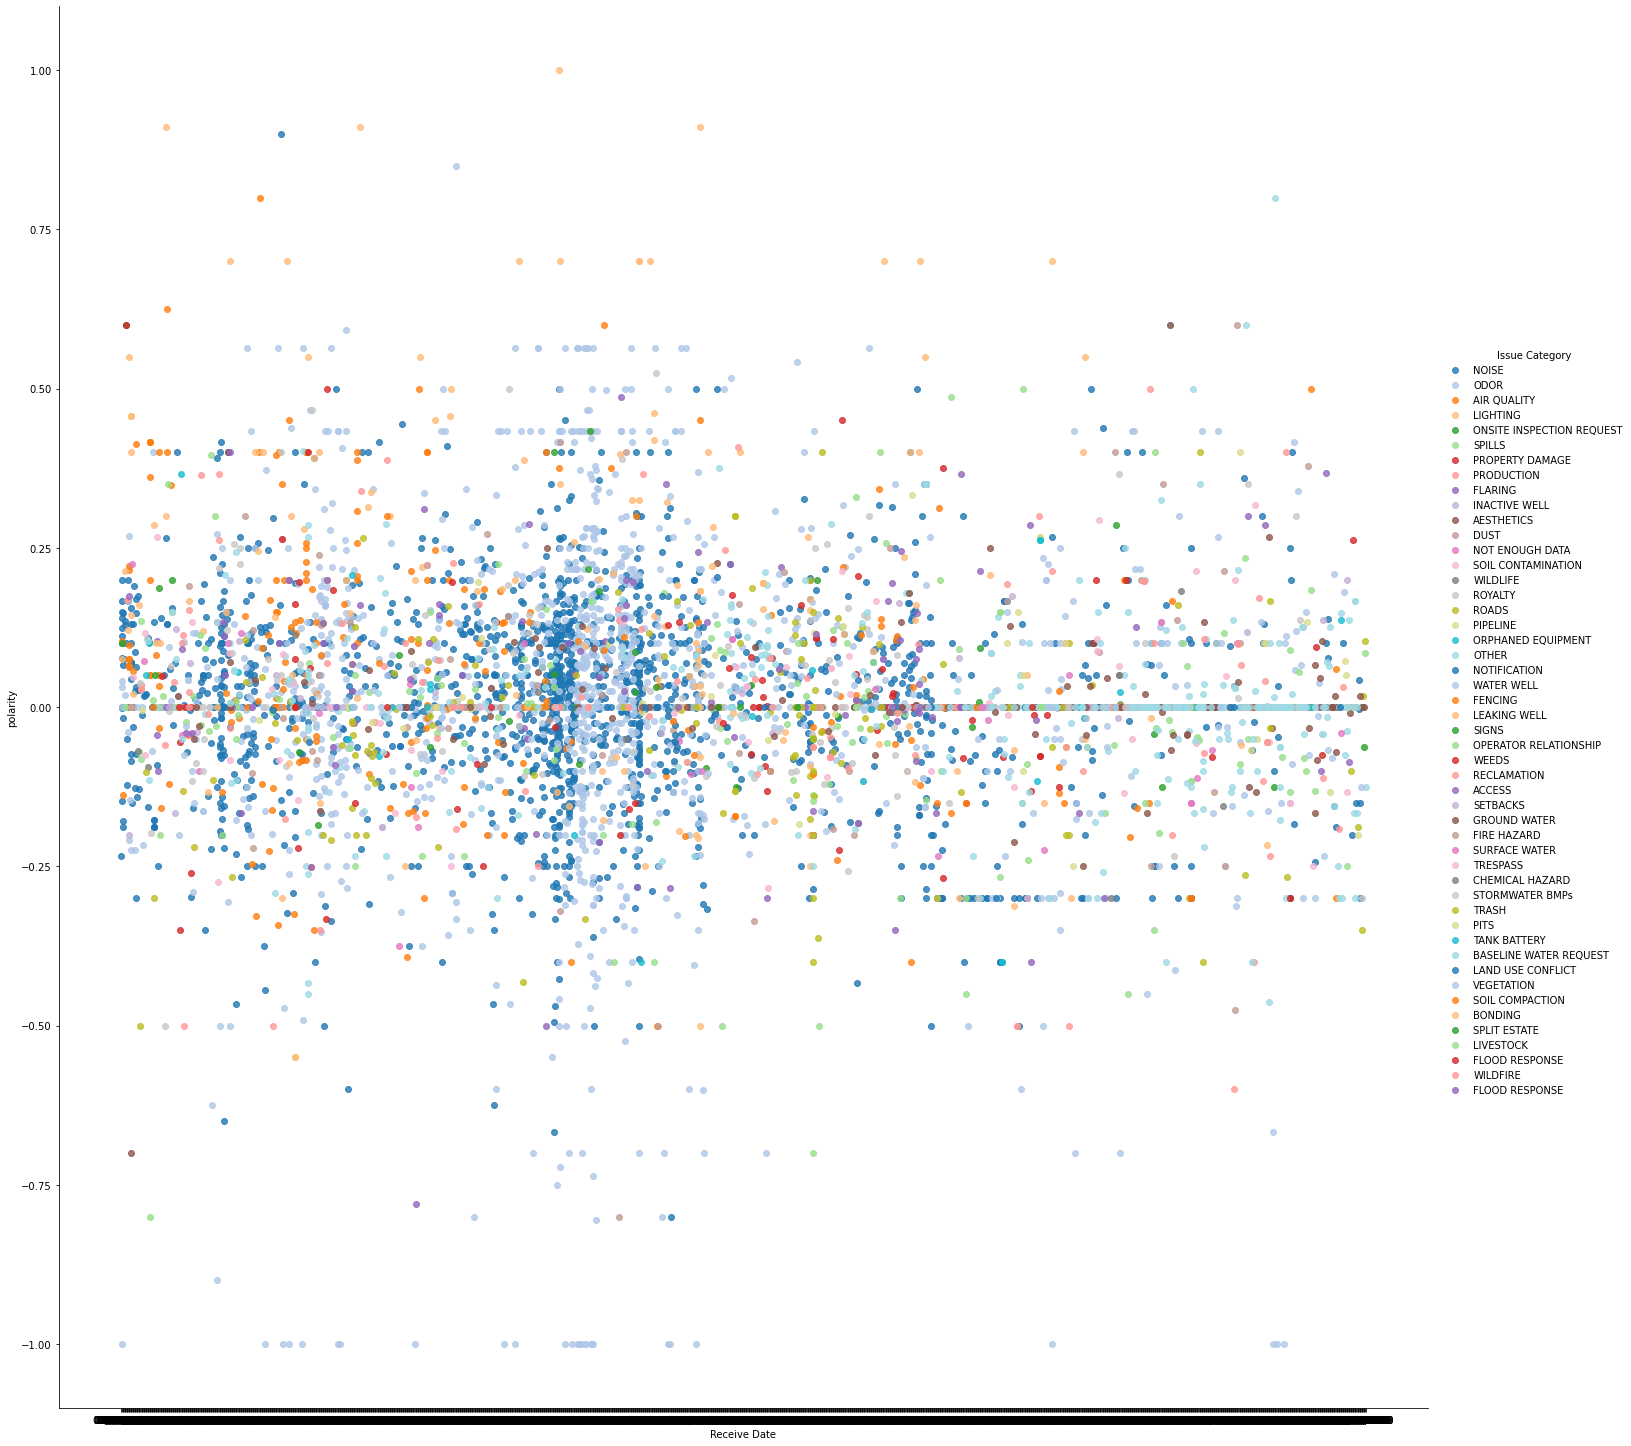

In [14]:
sca = sns.lmplot('Receive Date', 'polarity', data=data, hue='Issue Category', fit_reg=False, palette='tab20', height=20)

In [15]:
len(data['Facility ID'].unique())
# getting all of the unique facility ID and counting number of them

1169

# Ideas

* How does `issue category` relate to emotion?
* How does `facility category` relate to emotion?
* Number of complaints and oil price?
* Most emotional `Operator`? (t-tests f-tests)
* Most emotional `Counties`? (disentangle county and company)
* Emotion and repeat offenders? (`Facility ID`)
* Emotion and time between `Receive Date` and `Resolved Date`?


In [16]:
# determine negative connotation of the complaints (based on issue category; polarity v. subjectivity)
# query dataframe
noise_df = data[data['Issue Category'] == 'NOISE']

In [17]:
noise_df.mean()

Row                2.295080e+03
Document Number    2.004350e+08
Facility ID        4.036385e+05
Operator Number    1.995860e+04
NOAV Number        3.148795e+08
Form 19 Number              NaN
Form 27 Number              NaN
subjectivity       4.602688e-01
polarity           7.364078e-03
dtype: float64

In [18]:
noise_df.describe()

,Row,Document Number,Facility ID,Operator Number,NOAV Number,Form 19 Number,Form 27 Number,subjectivity,polarity
count,1754.000000,1.754000e+03,1635.000000,1634.000000,7.000000e+00,0.0,0.0,1754.000000,1754.000000
mean,2295.079818,2.004350e+08,403638.542508,19958.602815,3.148795e+08,NaN,NaN,0.460269,0.007364
std,1340.058770,2.945184e+04,68649.253968,24761.932064,1.071528e+08,NaN,NaN,0.212801,0.152945
min,1.000000,2.002322e+08,89111.000000,5.000000,2.002762e+08,NaN,NaN,0.000000,-0.800000
25%,1381.500000,2.004408e+08,415299.000000,10459.000000,2.003545e+08,NaN,NaN,0.355346,-0.063889
50%,2135.500000,2.004440e+08,434375.000000,10633.000000,4.006244e+08,NaN,NaN,0.462500,0.005556
75%,3239.000000,2.004460e+08,442411.000000,10633.000000,4.007928e+08,NaN,NaN,0.566667,0.100000
max,5405.000000,2.004495e+08,476531.000000,100322.000000,4.009613e+08,NaN,NaN,1.000000,0.900000


(array([  29.,   26.,   85.,  378., 1397., 2932.,  421.,  134.,   11.,
           8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

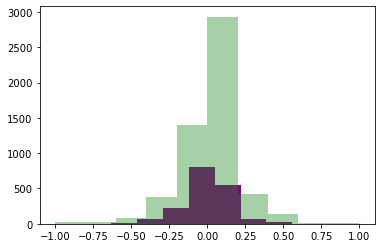

In [19]:
plt.hist(noise_df['polarity'], color="purple")
plt.hist(polarity, color="forestgreen", alpha = 0.4)

In [20]:
notif_df = data[data['Issue Category'] == 'NOTIFICATION']

In [21]:
notif_df.describe()

,Row,Document Number,Facility ID,Operator Number,NOAV Number,Form 19 Number,Form 27 Number,subjectivity,polarity
count,51.000000,5.100000e+01,31.000000,31.000000,0.0,0.0,0.0,51.000000,51.000000
mean,3178.431373,2.004178e+08,387417.516129,27119.193548,NaN,NaN,NaN,0.314803,0.014291
std,1284.308752,5.679459e+04,83808.495582,33248.023864,NaN,NaN,NaN,0.189221,0.116502
min,143.000000,2.002307e+08,159801.000000,10133.000000,NaN,NaN,NaN,0.000000,-0.433333
25%,3066.000000,2.004349e+08,320791.000000,10459.000000,NaN,NaN,NaN,0.222109,-0.024038
50%,3167.000000,2.004410e+08,434526.000000,10633.000000,NaN,NaN,NaN,0.300000,0.000000
75%,3870.000000,2.004412e+08,434526.000000,10633.000000,NaN,NaN,NaN,0.430991,0.038136
max,5411.000000,2.004493e+08,476864.000000,100322.000000,NaN,NaN,NaN,1.000000,0.300000


(array([0.01006104, 0.03689047, 0.22469649, 0.73780938, 2.70306526,
        1.84116976, 0.22469649, 0.10061037, 0.        , 0.00335368]),
 array([-0.8 , -0.63, -0.46, -0.29, -0.12,  0.05,  0.22,  0.39,  0.56,
         0.73,  0.9 ]),
 <BarContainer object of 10 artists>)

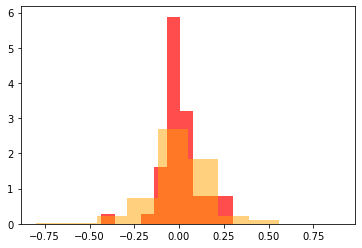

In [22]:
plt.hist(notif_df['polarity'], color="red", alpha = 0.7, density=1)
plt.hist(noise_df['polarity'], color="orange", alpha = 0.5, density=1)

In [23]:
# t-test: checks for if two distributions come from the same undelying distribution; mean
# f-test: checks two distributions to see if they have the same variance

This beloved project is related to oil/gas field. We are compiling a very big list (5422 items) of complaints against a variety of companies and analyzing them. Utilizing several libraries, including a very special Textblob, one thing we're doing is analyzing the connotation and content of each complaint and sorting them via polarity and subjectivity. We have also been comparing certain types of issues within the "Issue Category" column to see the contrast in how "popular" one complaint is versus the other. We are visualizing the results using histograms, scatterplots, etc. for visual quality control (making it more aesthically appealing!) 

In [24]:
# t-test: comparing means of two distributions

In [25]:
from scipy.stats import ttest_ind

In [26]:
# feeding in two different arrays; get data into array shape

In [27]:
# extracting column from pandas = series 
type(notif_df['polarity'])

pandas.core.series.Series

In [28]:
ttest_ind(notif_df['polarity'], notif_df['polarity'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [29]:
ttest_ind(noise_df['polarity'], notif_df['polarity'])

Ttest_indResult(statistic=-0.32068999567516737, pvalue=0.7484824931556224)

In [30]:
ttest_ind(noise_df['polarity'], notif_df['polarity'], equal_var=False) 
# if pvalue (probability) is < 0.05, highly unlikely that the two arguments came from same distribution

Ttest_indResult(statistic=-0.4143336490252181, pvalue=0.6802374287216033)

In [31]:
ttest_ind(notif_df['subjectivity'], noise_df['subjectivity'])

Ttest_indResult(statistic=-4.826290329581814, pvalue=1.5082131204324651e-06)

In [32]:
import seaborn

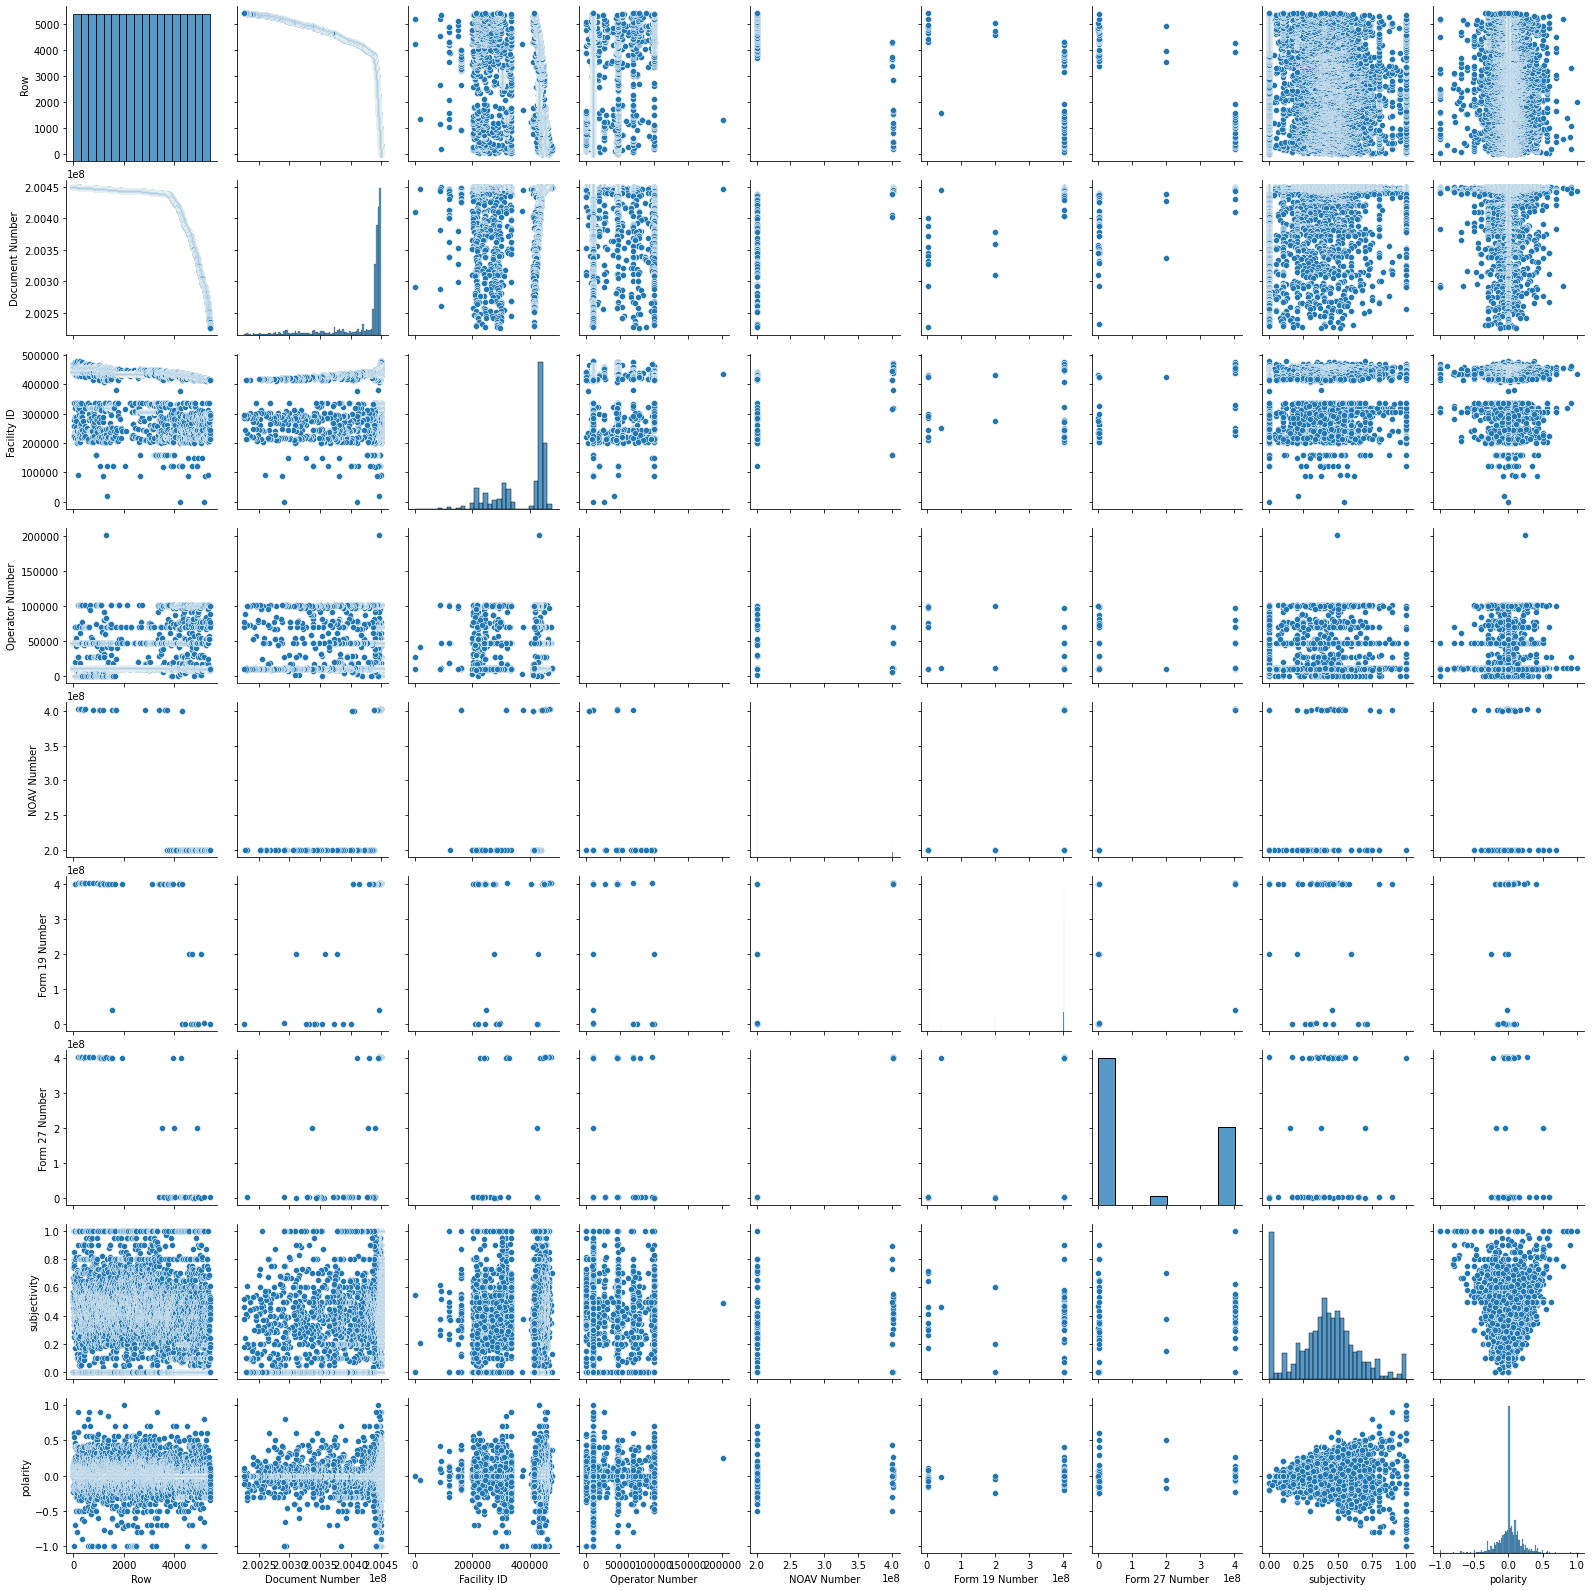

In [33]:
seaborn.pairplot(data)

C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nethr\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

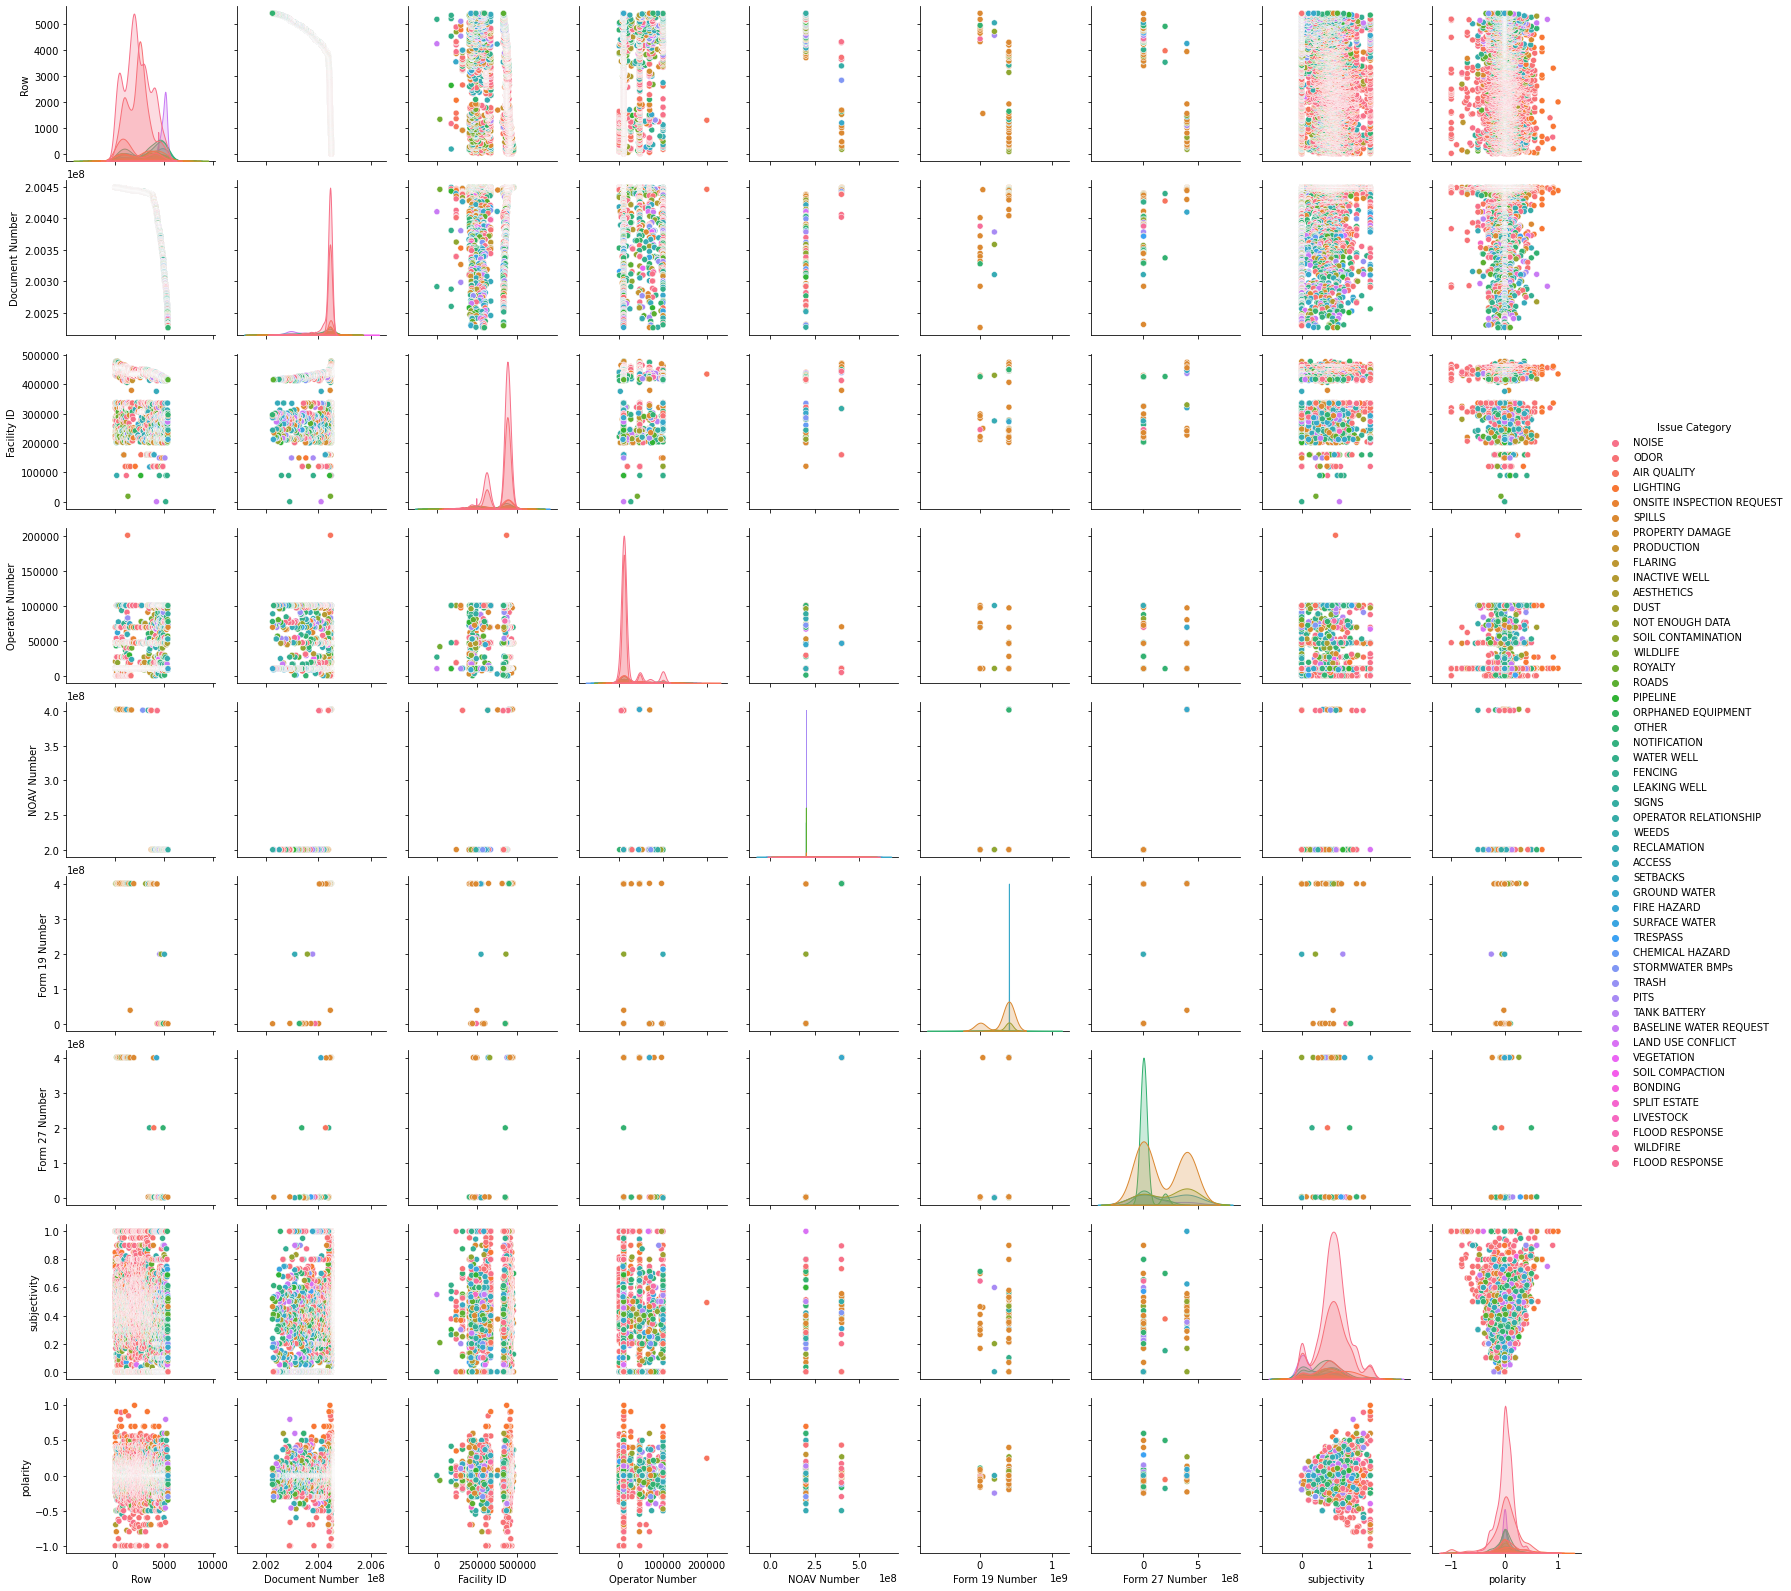

In [34]:
seaborn.pairplot(data, hue='Issue Category')

In [35]:
np.var(noise_df['polarity'])

0.023378762377220006

In [36]:
np.var(noise_df['Form 19 Number'])

nan

In [37]:
np.var(noise_df['Row'])

1794733.700584688

In [38]:
np.var(noise_df['subjectivity'])

0.045258377259043824

In [39]:
np.var(notif_df['subjectivity'])

0.03510255277108453

In [40]:
np.var(data['subjectivity'])

0.058512036700078596

In [41]:
np.var(data['polarity'])

0.03691263488154847

##### Not a lot of variance between the datasets...

In [42]:
# density estimate: continuous version of a histogram
# don't have to figure out how big the bins are to put all your items; 
# just a better estimate as to what your data looks like

In [43]:
# f-test (anovas (analysis of variance))
from scipy.stats import f

In [44]:
# calculate variance of data
P = np.var(data['polarity'])
S = np.var(data['subjectivity'])
V = P / S

In [45]:
f.cdf(V, len(data['polarity']), len(data['subjectivity']))
# first item: ratio of variances
# second item: number of items in first list
# third item: number of items in second list 

2.853333290085452e-64

Anovas, t-test, f-test, scale up t-test (run all features, one-by-one)

conclusion: Some issue category people are more angry about (polarity and subjectivity)

In [46]:
# Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures
# test the hypothesis that 2 or more groups have the same pop. mean
from scipy.stats import f_oneway

In [47]:
f_oneway(notif_df['polarity'], noise_df['polarity'])

F_onewayResult(statistic=0.1028420733261389, pvalue=0.7484824931555518)

(array([0.01006104, 0.03689047, 0.22469649, 0.73780938, 2.70306526,
        1.84116976, 0.22469649, 0.10061037, 0.        , 0.00335368]),
 array([-0.8 , -0.63, -0.46, -0.29, -0.12,  0.05,  0.22,  0.39,  0.56,
         0.73,  0.9 ]),
 <BarContainer object of 10 artists>)

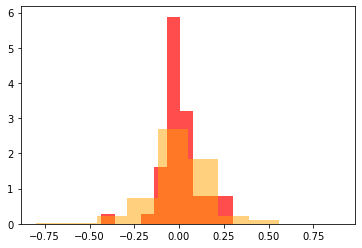

In [48]:
plt.hist(notif_df['polarity'], color="red", alpha = 0.7, density=1)
plt.hist(noise_df['polarity'], color="orange", alpha = 0.5, density=1)

In [49]:
chem_df = data[data['Issue Category'] == 'CHEMICAL HAZARD']

(array([2.59046053, 0.        , 0.        , 2.59046053, 0.        ,
        0.        , 5.18092105, 5.18092105, 2.59046053, 2.59046053]),
 array([-0.3       , -0.25174603, -0.20349206, -0.1552381 , -0.10698413,
        -0.05873016, -0.01047619,  0.03777778,  0.08603175,  0.13428571,
         0.18253968]),
 <BarContainer object of 10 artists>)

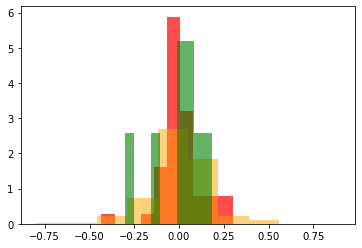

In [50]:
plt.hist(notif_df['polarity'], color="red", alpha = 0.7, density=1)
plt.hist(noise_df['polarity'], color="orange", alpha = 0.5, density=1)
plt.hist(chem_df['polarity'], color="green", alpha = 0.6, density=1)

In [51]:
f, p = f_oneway(chem_df['polarity'], noise_df['polarity'], chem_df['polarity'])

In [52]:
# test statistic
print(f)

0.07452572580753916


In [53]:
# should be the probability..?
print(p)

0.928186512812363


In [54]:
fire_df = data[data['Issue Category'] == 'FIRE HAZARD']

(array([2.39945921, 0.        , 2.39945921, 0.        , 4.79891843,
        0.        , 2.39945921, 2.39945921, 0.        , 4.79891843]),
 array([-0.22095072, -0.16885565, -0.11676057, -0.0646655 , -0.01257043,
         0.03952464,  0.09161971,  0.14371478,  0.19580986,  0.24790493,
         0.3       ]),
 <BarContainer object of 10 artists>)

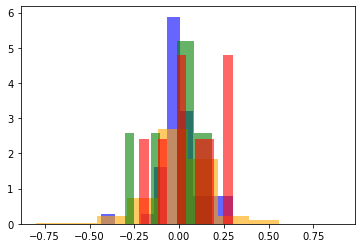

In [55]:
plt.hist(notif_df['polarity'], color="blue", alpha = 0.6, density=1)
plt.hist(noise_df['polarity'], color="orange", alpha = 0.6, density=1)
plt.hist(chem_df['polarity'], color="green", alpha = 0.6, density=1)
# fired up about fire - Dr. Pisel
plt.hist(fire_df['polarity'], color="red", alpha = 0.6, density=1)

In [56]:
f, p = f_oneway(chem_df['polarity'], noise_df['polarity'], chem_df['polarity'], fire_df['polarity'])

In [57]:
print(f)

0.45573336392010383


In [58]:
print(p)

0.7132742145710314


(array([4.11764706, 0.        , 0.        , 0.        , 0.        ,
        6.17647059, 0.        , 2.05882353, 2.05882353, 2.05882353]),
 array([0.        , 0.06071429, 0.12142857, 0.18214286, 0.24285714,
        0.30357143, 0.36428571, 0.425     , 0.48571429, 0.54642857,
        0.60714286]),
 <BarContainer object of 10 artists>)

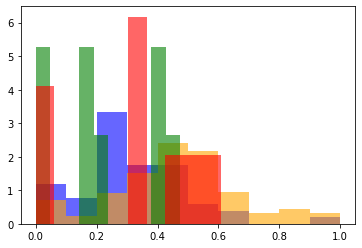

In [59]:
plt.hist(notif_df['subjectivity'], color="blue", alpha = 0.6, density=1)
plt.hist(noise_df['subjectivity'], color="orange", alpha = 0.6, density=1)
plt.hist(chem_df['subjectivity'], color="green", alpha = 0.6, density=1)
plt.hist(fire_df['subjectivity'], color="red", alpha = 0.6, density=1)

In [60]:
f, p = f_oneway(chem_df['subjectivity'], noise_df['subjectivity'], chem_df['subjectivity'], fire_df['subjectivity'])

In [61]:
print(f)

7.940718387964912


In [62]:
print(p)

2.92691260329083e-05


To conclude, via ANOVA, we can see that the issues via subjectivity do not have similiar pop. means, but via polarity, they do have similiar pop. means.

In [63]:
# each person's perspective vs. the connotation of the words

For polarity, a bulk of the issues (noise, notifications, fire hazards, chemical hazards) sit in the middle of the graph, meaning that a huge amount of those complaints are neutral-toned. 
For subjectivity...they're just all over the place! Each person obviously has their own perspective on each issue, so there's no way of telling what the majority think. 

In [64]:
noise_df['subjectivity'].mean()

0.4602687645030239

In [65]:
fire_df['subjectivity'].mean()

0.3151772186147186

In [66]:
notif_df['subjectivity'].mean()

0.31480285274984465

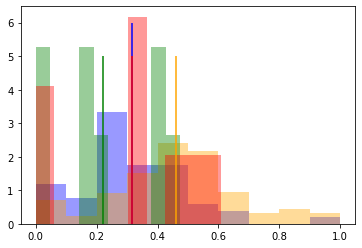

In [67]:
plt.hist(notif_df['subjectivity'], color="blue", alpha = 0.4, density=1)
plt.hist(noise_df['subjectivity'], color="orange", alpha = 0.4, density=1)
plt.hist(chem_df['subjectivity'], color="green", alpha = 0.4, density=1)
plt.hist(fire_df['subjectivity'], color="red", alpha = 0.4, density=1)
# plot vertical line
plt.vlines(noise_df['subjectivity'].mean(), 0, 5, color="orange", alpha = 1)
plt.vlines(notif_df['subjectivity'].mean(), 0, 6, color="blue", alpha = 1)
plt.vlines(chem_df['subjectivity'].mean(), 0, 5, color="green", alpha = 1)
plt.vlines(fire_df['subjectivity'].mean(), 0, 5, color="red", alpha = 1)

Conclusions:
- Fire hazards and notifications have about the same mean
- Noise complaints are the most subjective (meaning more people get more worked up about noise)
- Chemical hazards are the least subjective (meaning less people get worked up about them, unless you're a chemist)

In [68]:
# spatial perspective: looked at complaints as a function (what class they are?)
# hypothesis: maybe there's a spatial trend? do more people get angry in one area versus another? 

In [69]:
data.columns

Index(['Row', 'Document Number', 'Receive Date', 'Form Status',
       'Form Status Date', 'Complainant Connection', 'Facility Type',
       'Well Name', 'Well Number', 'API State Code', 'API County Code',
       'API Sequence Number', 'Facility Name', 'Facility ID', 'County Name',
       'Qtr Qtr', 'Section', 'Township', 'Range', 'Meridian',
       'Operator Number', 'Operator', 'Initial Contact Date',
       'Method Received', 'Routed Agency', 'Issue Category',
       'Issue Description', 'Issue Resolution', 'Issue Resolved Date',
       'Letter Sent', 'NOAV', 'NOAV Number', 'Form 19', 'Form 19 Number',
       'Form 27', 'Form 27 Number', 'subjectivity', 'polarity'],
      dtype='object')

In [70]:
# read in new file with lat and long
spatial = pd.read_csv('spatial_complaints.csv', index_col=[0])
spatial.head(10)

,Row,Document Number,Receive Date,Form Status,Form Status Date,Complainant Connection,Facility Type,Well Name,Well Number,API State Code,...,qtrqtr,sec,twp,range,meridian,county,county_API,municipal,latitude,longitude
0,1,200449466,03/02/2021,ON HOLD,03/02/2021,Nearby resident,LOCATION,,,05,...,SWSE,11.0,1S,68W,6,ADAMS,1.0,NaN,39.974865,-104.965652
1,2,200449464,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SESW,8.0,1N,68W,6,WELD,123.0,NaN,40.060711,-105.028599
2,3,200449463,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SESW,8.0,1N,68W,6,WELD,123.0,NaN,40.060711,-105.028599
3,4,200449463,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SESW,8.0,1N,68W,6,WELD,123.0,NaN,40.060711,-105.028599
4,5,200449462,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SESW,8.0,1N,68W,6,WELD,123.0,NaN,40.060711,-105.028599
5,6,200449462,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SESW,8.0,1N,68W,6,WELD,123.0,NaN,40.060711,-105.028599
6,7,200449461,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SESW,8.0,1N,68W,6,WELD,123.0,NaN,40.060711,-105.028599
7,8,200449460,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SWSE,11.0,1S,68W,6,ADAMS,1.0,NaN,39.974865,-104.965652
8,9,200449459,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SWNE,30.0,3N,68W,6,WELD,123.0,NaN,40.198041,-105.041968
9,10,200449458,03/01/2021,ON HOLD,03/01/2021,Nearby resident,LOCATION,,,05,...,SESW,8.0,1N,68W,6,WELD,123.0,NaN,40.060711,-105.028599


In [71]:
spatial.columns

Index(['Row', 'Document Number', 'Receive Date', 'Form Status',
       'Form Status Date', 'Complainant Connection', 'Facility Type',
       'Well Name', 'Well Number', 'API State Code', 'API County Code',
       'API Sequence Number', 'Facility Name', 'Facility ID', 'County Name',
       'Qtr Qtr', 'Section', 'Township', 'Range', 'Meridian',
       'Operator Number', 'Operator', 'Initial Contact Date',
       'Method Received', 'Routed Agency', 'Issue Category',
       'Issue Description', 'Issue Resolution', 'Issue Resolved Date',
       'Letter Sent', 'NOAV', 'NOAV Number', 'Form 19', 'Form 19 Number',
       'Form 27', 'Form 27 Number', 'loc_id', 'fac_status', 'fac_name',
       'fac_num', 'oper_name', 'oper_num', 'lat', 'long', 'utm_x', 'utm_y',
       'qtrqtr', 'sec', 'twp', 'range', 'meridian', 'county', 'county_API',
       'municipal', 'latitude', 'longitude'],
      dtype='object')

In [72]:
# connotation of the words
polarity = []
# opinions
subjectivity = []
# data.shape  = number of rows in dataset
for i in range(spatial.shape[0]):
    try:
        text = TextBlob(spatial['Issue Description'][i])
        # sentiment  = attribute of "text" item --> attribute: list of qualities
        subjectivity.append(text.sentiment.subjectivity)
        polarity.append(text.sentiment.polarity)
    except:
        subjectivity.append(np.nan)
        polarity.append(np.nan)

In [73]:
spatial['subjectivity'] = subjectivity
spatial['polarity'] = polarity

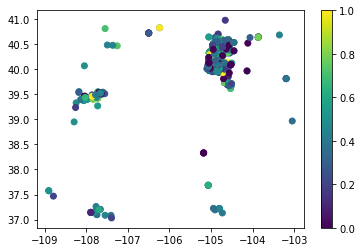

In [74]:
# plot up new spatial data and look and see what new things are in the data set 
# c = color
# how opinionated are the people
plt.scatter(spatial.longitude, spatial.latitude, c=spatial['subjectivity'])
plt.colorbar()

In [75]:
# the more dense, the more pop.; higher numbers of people complaining are from more urbanized areas 
# bound the corner
spatial2 = spatial.query("latitude > 39.5 and longitude > -105.5")

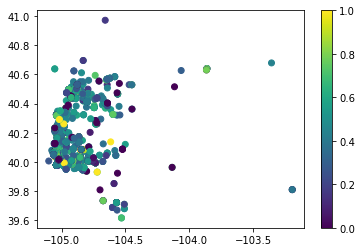

In [76]:
plt.scatter(spatial2.longitude, spatial2.latitude, c=spatial2['subjectivity'])
plt.colorbar()

In [89]:
# investigate how the distribution is for subjectivity and polarity
df_spatial = spatial.query("latitude <= 39.5 or longitude < -105.5")

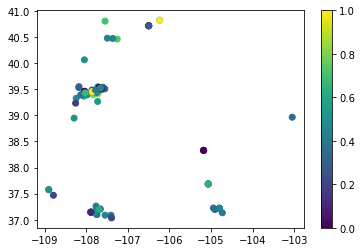

In [90]:
plt.scatter(df_spatial.longitude, df_spatial.latitude, c=df_spatial['subjectivity'])
plt.colorbar()

In [91]:
f, p = f_oneway(spatial2['subjectivity'], df_spatial['subjectivity'])

In [92]:
# null hypothesis: testing if the 2 distributions have the same variance
print(f)

7.733930622746928


In [95]:
# 0.05 is stastically significant (5% probability that they have the same variance)
# we get to reject the null hypothesis 
# high enough to where it's not conclusive that they are different enough 
print(p)

0.005457710468182785


In [96]:
# same variance: rural areas have the same spread on subjectivity as urban areas 
# t-test
ttest_ind(spatial2['subjectivity'], df_spatial['subjectivity'])

Ttest_indResult(statistic=2.7809945384245083, pvalue=0.005457710468184352)

In [97]:
# variance and the mean of the subjectivity shows that both rural and urban areas don't have the same subjectivity 

In [98]:
# now for polarity!
f, p = f_oneway(spatial2['polarity'], df_spatial['polarity'])

In [99]:
print(p)

0.0753853717020758


In [100]:
ttest_ind(spatial2['polarity'], df_spatial['polarity'])

Ttest_indResult(statistic=1.778813311644222, pvalue=0.07538537170210405)

In [101]:
# variance and the mean of the polarity shows that both rural and urban areas are very close to not having the same polarity

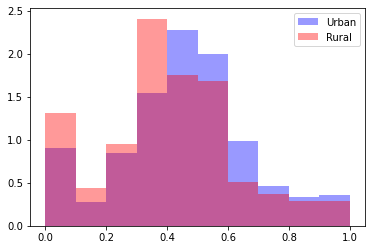

In [108]:
plt.hist(spatial2['subjectivity'], color="blue", alpha = 0.4, density=1, label="Urban")
plt.hist(df_spatial['subjectivity'], color="red", alpha = 0.4, density=1, label="Rural")
plt.legend()

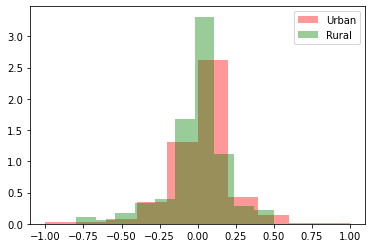

In [109]:
plt.hist(spatial2['polarity'], color="red", alpha = 0.4, density=1, label="Urban")
plt.hist(df_spatial['polarity'], color="green", alpha = 0.4, density=1, label="Rural")
plt.legend()

In [110]:
# social science: how do we interpret this data?
# urban v. rural persepctive in terms of oil & gas complaints
# Subjectivity: urban areas are more prone to having more subjective complaints; rural areas are more prone 
# to havung more objective complaints
# Polarity: both for urban and rural areas, their complaints more neutral-toned; no super-polarized complaints on 
# either end of the spectrum 
# established statistically that there is a difference between the two areas in terms of subjectivity
# established for polarity that it's quite close to being the same way, but not fully since it's 0.07, not 0.05

Analysis:
- Overall data set: 
    - 0 variance
    - Polarity: more condensed towards being fairly neutral
    - Subjectivity: more condensed towards being neither subjective nor objective 
- Comparisons between 4 types of issues (fire, chemicals, noise, notifications)
    - Via ANOVA, we can see that the issues via subjectivity do not have similiar pop. means, but via polarity, they do have similiar pop. means
    - For polarity, a bulk of the issues (noise, notifications, fire hazards, chemical hazards) sit in the middle of the graph, meaning that a huge amount of those complaints are neutral-toned. 
    - For subjectivity...they're just all over the place! Each person obviously has their own perspective on each issue, so there's no way of telling what the majority think.
- Spatial Perspective for overall data set:
    - social science: how do we interpret this data?
        - urban v. rural persepctive in terms of oil & gas complaints
        - Subjectivity: urban areas are more prone to having more subjective complaints; rural areas are more prone to having more objective complaints
        - Polarity: both for urban and rural areas, their complaints more neutral-toned; no super-polarized complaints on either end of the spectrum 
        - established statistically that there is a difference between the two areas in terms of subjectivity
        - established for polarity that it's quite close to being the same way, but not fully since it's 0.07, not 0.05

Overall, between the types of complaints and the spatial perspective, the trend of subjectivity is the same, which is great! If it was different, we would have to search for another factor to determine why. 

In [ ]:
# build models based on locations, time, etc. to find out how subjective the complaints are towards oil & gas complaints